In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing

csv_data = pd.read_csv("bankCustomer.csv")
array = csv_data.values

X = array[:,2:6]
Y = array[:,1:4]

In [46]:
print(csv_data)

    customerId geography  gender    balance  age  Credit Score Age Category  \
0     15634602    France  Female       0.00   42           619          Tua   
1     15647311     Spain  Female   83807.86   41           608         Muda   
2     15701354    France  Female  159660.80   42           502          Tua   
3     15619304    France  Female       0.00   39           699         Muda   
4     15737888     Spain  Female  125510.82   43           685          Tua   
5     15574012     Spain    Male  113755.78   44           645          Tua   
6     15592531    France    Male  115046.74   50           682          Tua   
7     15656148   Germany  Female  142051.07   29           376         Muda   
8     15792365    France    Male  134603.88   44           501          Tua   
9     15592389    France    Male  102016.72   27           684         Muda   
10    15767821    France    Male       0.00   31           528         Muda   
11    15737173     Spain    Male       0.00   24    

In [47]:
dataset = pd.DataFrame({
    'Customer ID': array[:, 0],
    'Geography': array[:, 1],
    'Gender': array[:, 2],
    'Balance': array[:, 3],
    'Age': array[:, 4],
    'Credit Score': array[:,5],
    'Age Category': array[:, 6],
    'CS Category': array[:, 7]
})

#print(dataset.duplicated().sum())
print("Sebelum di-Normalisasi:")
print(dataset.head(20))

min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))  # Inisialisasi normalisasi MinMax
data = min_max_scaler.fit_transform(array[:, 3:6])  # Transformasi MinMax untuk fitur Balance Age dan Creadit Score

dataset['Balance'] = data[:, 0]
dataset['Age'] = data[:, 1]
dataset['Credit Score'] = data[:, 2]

print("\nSetelah di-Normalisasi:")
print(dataset.head(20))

dataset.to_csv("bankCustomerPreprocessed.csv",encoding="utf8")

Sebelum di-Normalisasi:
   Customer ID Geography  Gender    Balance Age Credit Score Age Category  \
0     15634602    France  Female        0.0  42          619          Tua   
1     15647311     Spain  Female   83807.86  41          608         Muda   
2     15701354    France  Female   159660.8  42          502          Tua   
3     15619304    France  Female        0.0  39          699         Muda   
4     15737888     Spain  Female  125510.82  43          685          Tua   
5     15574012     Spain    Male  113755.78  44          645          Tua   
6     15592531    France    Male  115046.74  50          682          Tua   
7     15656148   Germany  Female  142051.07  29          376         Muda   
8     15792365    France    Male  134603.88  44          501          Tua   
9     15592389    France    Male  102016.72  27          684         Muda   
10    15767821    France    Male        0.0  31          528         Muda   
11    15737173     Spain    Male        0.0  24     

In [48]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
datanew = pd.DataFrame({
    'Customer ID': array[:, 0],
    'Geography': array[:, 1],
    'Gender': array[:, 2],
    'Balance': array[:, 3],
    'Age': array[:, 4],
    'Credit Score': array[:,5],
    'Age Category': array[:, 6],
    'CS Category': array[:, 7]
})
print("Sebelum di-Standarisasi:")
print(datanew.head(20))

scaler = preprocessing.StandardScaler()  # Inisialisasi StandardScaler dengan rentang fitur (0, 1)

data = datanew[['Balance', 'Age', 'Credit Score']].values  # Mengambil kolom yang akan dinormalisasi

data_scaled = scaler.fit_transform(data)  # Melakukan normalisasi menggunakan StandardScaler

datanew[['Balance', 'Age', 'Credit Score']] = pd.DataFrame(data_scaled, columns=['Balance', 'Age', 'Credit Score'])

print("\nSetelah di-Standarisasi:")
print(datanew.head(20))


Sebelum di-Standarisasi:
   Customer ID Geography  Gender    Balance Age Credit Score Age Category  \
0     15634602    France  Female        0.0  42          619          Tua   
1     15647311     Spain  Female   83807.86  41          608         Muda   
2     15701354    France  Female   159660.8  42          502          Tua   
3     15619304    France  Female        0.0  39          699         Muda   
4     15737888     Spain  Female  125510.82  43          685          Tua   
5     15574012     Spain    Male  113755.78  44          645          Tua   
6     15592531    France    Male  115046.74  50          682          Tua   
7     15656148   Germany  Female  142051.07  29          376         Muda   
8     15792365    France    Male  134603.88  44          501          Tua   
9     15592389    France    Male  102016.72  27          684         Muda   
10    15767821    France    Male        0.0  31          528         Muda   
11    15737173     Spain    Male        0.0  24    

# Visualisasi Data

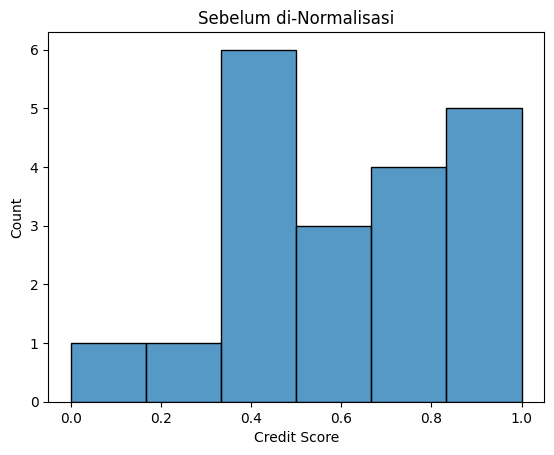

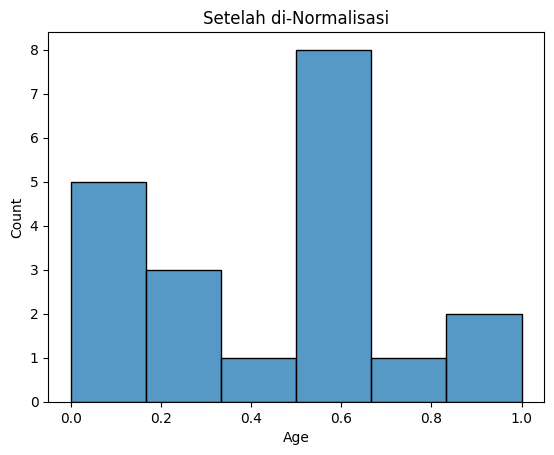

In [49]:
sns.histplot(data=dataset, x="Credit Score")
plt.title("Sebelum di-Normalisasi")
plt.show()

sns.histplot(data=dataset, x="Age")
plt.title("Setelah di-Normalisasi")
plt.show()

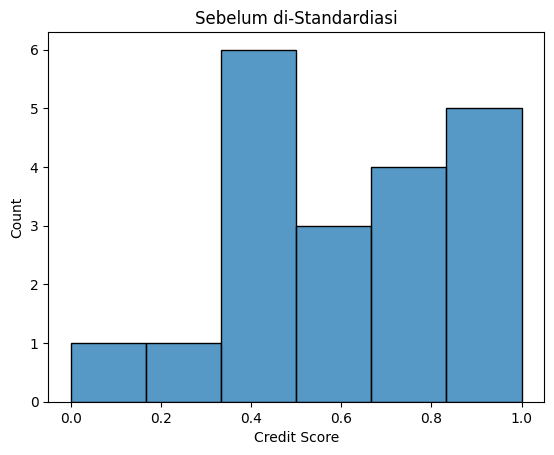

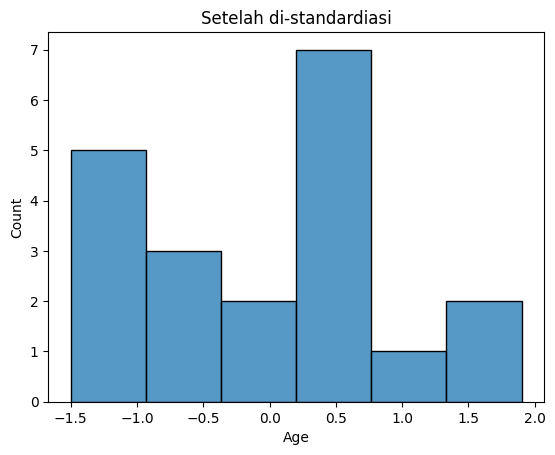

In [56]:
sns.histplot(data=dataset, x="Credit Score")
plt.title("Sebelum di-Standardiasi")
plt.show()

sns.histplot(data=datanew, x="Age")
plt.title("Setelah di-standardiasi")
plt.show()

<AxesSubplot:xlabel='Age Category', ylabel='count'>

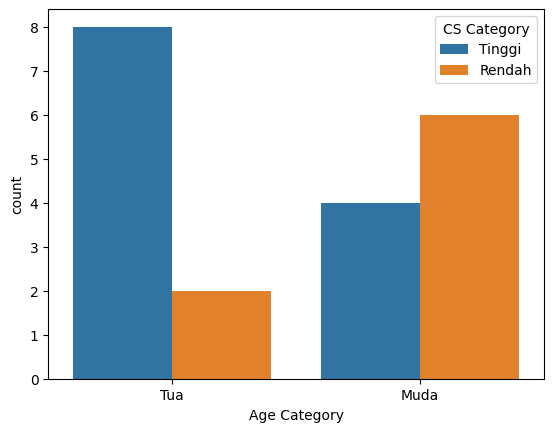

In [54]:
sns.countplot(x="Age Category", hue="CS Category", data=dataset)